In [1]:
# Preinstall 
We use sos notebooks. You could use a docker instalation [guide](https://vatlab.github.io/sos-docs/running.html)
This notebook is self contained 

# Preinstall 
We use sos notebooks. You could use a docker instalation [guide](https://vatlab.github.io/sos-docs/running.html)
This notebook is self contained 


In [ ]:
!pip install iplantuml

In [ ]:
!npm init -y
!npm install @affinidi/wallet-node-sdk fetch@2

In [2]:
# Revocable VCs 

# Revocable VCs 


In [64]:
Lets prepare our test wallets 

Lets prepare our test wallets 


In [16]:
const { createWallet } = require('@affinidi/wallet-node-sdk')
// @ts-ignore
const walletFactory = createWallet('AffinityCore')

In [5]:
Lets prepare options 
- get your API key [production](https://apikey.affinidi.com/) or register affinidi account on [register](https://build.affinidi.com/register)
- set env to prod 

Lets prepare options 
- get your API key [production](https://apikey.affinidi.com/) or register affinidi account on [register](https://build.affinidi.com/register)
- set env to prod 


In [4]:
import ipywidgets
apikey_widget = ipywidgets.Password(description='API KEY:', placeholder='EnterAPI key')
apikey_widget

Password(description='API KEY:', placeholder='EnterAPI key')

In [6]:
accessApiKey = apikey_widget.value 

In [7]:
%get accessApiKey --from Python3
options = {
    env: 'prod',
    accessApiKey: accessApiKey
}
1

1

In [8]:
Lets create our issuer and holder wallets.
We need to have a holder did to issue a VC for concrete holder.

Lets create our issuer and holder wallets.
We need to have a holder did to issue a VC for concrete holder.


In [17]:
 password = `P@${(Math.random() + 1).toString(36).substring(2)}!!42`;

(async () => {
  walletIssuer  = await walletFactory.createWallet(options, password)
  walletHolder  = await walletFactory.createWallet(options, password)
    })().catch(console.error)

In [10]:
## Lets create a Unsigned Credential 
I just create a custom schema for content Like VCs. Its allow to issue verifiable likes for a content that i like.
[Schema](https://ui.schema.affinidi.com/schemas/ContentLikeV1-0)


## Lets create a Unsigned Credential 
I just create a custom schema for content Like VCs. Its allow to issue verifiable likes for a content that i like.
[Schema](https://ui.schema.affinidi.com/schemas/ContentLikeV1-0)


In [11]:

// https://ui.schema.affinidi.com/schemas/ContentLikeV1-0
const jsonSchema = 'https://schema.affinidi.com/ContentLikeV1-0.json'
const jsonContext = 'https://schema.affinidi.com/ContentLikeV1-0.jsonld'

In [65]:
Every VC should have a unique id. 

Every VC should have a unique id. 


In [13]:
const id = `claimId:${(Math.random() + 1).toString(36).substring(2)}`

In [18]:
  unsignedVC = {
    '@context': ['https://www.w3.org/2018/credentials/v1', jsonContext],
    id,
    type: ['VerifiableCredential', 'ContentLike'],
    holder: {
      id: walletHolder.did
    },
    credentialSubject: {
      data: {
        '@type': ['VerifiableCredential', 'ContentLike'],
        url: 'https://www.youtube.com/watch?v=owbkzvLhblk',
        date: new Date().toISOString(),
        like: true,
        score: 10
      },
    },
    credentialSchema: {
      id:  jsonSchema,
      type: 'JsonSchemaValidator2018',
    },
    issuanceDate: new Date().toISOString(),
    expirationDate: '2065-09-10T00:00:00.000Z',
  }
  unsignedVC  

{
  '@context': [
    'https://www.w3.org/2018/credentials/v1',
    'https://schema.affinidi.com/ContentLikeV1-0.jsonld'
  ],
  id: 'claimId:i2wgld5x7b',
  type: [ 'VerifiableCredential', 'ContentLike' ],
  holder: {
    id: 'did:elem:EiAs9VqvNcEMkm9OfMdseWR0jMIltWHuUd5tCK_f17M6jA;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBek5UUXhZMk01T1RabU56VmxaR1U1WkRnd00yVXlOVE5oTm1FNU5UWXdOekF5TWprMk1EaGhNemM0WVRWbE56RmlaV1V4WldGaE1EQXpObU0zTkdJME1DSjlMSHNpYVdRaU9pSWpjbVZqYjNabGNua2lMQ0oxYzJGblpTSTZJbkpsWTI5MlpYSjVJaXdpZEhsd1pTSTZJbE5sWTNBeU5UWnJNVlpsY21sbWFXTmhkR2x2Ymt0bGVUSXdNVGdpTENKd2RXSnNhV05MWlhsSVpYZ2lPaUl3TTJOaU1qZzFPVGRrWkRjM01

In [19]:
It is already good VC to sign but what if i ll change my mind in a future ?

VCs are immutable and owned by holder. Once you issue tham you do not have a control on VC any more.

We have a special type of VCs that allow you to Revoke a VC in a future even if you dont have a control on VC itself

It is based on [Revocation List 2020](https://w3c-ccg.github.io/vc-status-rl-2020/#core-concept) standard 

It is quite complex flow but we make it easy for you and implement a method in our SDK.
You could upgrade your VC to revocapbe VC. We will prepare and publish revocation list for you 


It is already good VC to sign but what if i ll change my mind in a future ?

VCs are immutable and owned by holder. Once you issue tham you do not have a control on VC any more.

We have a special type of VCs that allow you to Revoke a VC in a future even if you dont have a control on VC itself

It is based on [Revocation List 2020](https://w3c-ccg.github.io/vc-status-rl-2020/#core-concept) standard 

It is quite complex flow but we make it easy for you and implement a method in our SDK.
You could upgrade your VC to revocapbe VC. We will prepare and publish revocation list for you 


In [20]:
(async () => { 
   RevocableVC = await walletIssuer.buildRevocationListStatus(unsignedVC)

})().catch(console.error)

In [21]:

RevocableVC

{
  '@context': [
    'https://www.w3.org/2018/credentials/v1',
    'https://schema.affinidi.com/ContentLikeV1-0.jsonld',
    'https://w3id.org/vc-revocation-list-2020/v1'
  ],
  id: 'claimId:i2wgld5x7b',
  type: [ 'VerifiableCredential', 'ContentLike' ],
  holder: {
    id: 'did:elem:EiAs9VqvNcEMkm9OfMdseWR0jMIltWHuUd5tCK_f17M6jA;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBek5UUXhZMk01T1RabU56VmxaR1U1WkRnd00yVXlOVE5oTm1FNU5UWXdOekF5TWprMk1EaGhNemM0WVRWbE56RmlaV1V4WldGaE1EQXpObU0zTkdJME1DSjlMSHNpYVdRaU9pSWpjbVZqYjNabGNua2lMQ0oxYzJGblpTSTZJbkpsWTI5MlpYSjVJaXdpZEhsd1pTSTZJbE5sWTNBeU5UWnJNVlpsY21sbWFXTmhkR2x2Ymt0bGVUSXdNVGdpTENK

In [22]:
(async () => {
revocationListVc = await fetch(RevocableVC.credentialStatus.revocationListCredential)
})().catch(console.error)

In [23]:
Together with a VC we issue a Revocation List VC connected to our Credential. This credential is Issuer specific List and Signed and controled by issuer. Every time when Issuer bublish new Revocable VC or revoke a VC. Revocation List gets updated and published.



Together with a VC we issue a Revocation List VC connected to our Credential. This credential is Issuer specific List and Signed and controled by issuer. Every time when Issuer bublish new Revocable VC or revoke a VC. Revocation List gets updated and published.



In [24]:
revocationListVc.json()

{
  id: 'https://revocation-api.prod.affinity-project.org/api/v1/revocation/revocation-list-2020-credentials/did:elem:EiBIkVawTQOfOCYp2xSITNKKePuELFTj3oc1ITnxk2uehw/20551',
  '@context': [
    'https://www.w3.org/2018/credentials/v1',
    'https://w3id.org/vc-revocation-list-2020/v1'
  ],
  type: [ 'VerifiableCredential', 'RevocationList2020Credential' ],
  issuer: 'did:elem:EiBIkVawTQOfOCYp2xSITNKKePuELFTj3oc1ITnxk2uehw;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBek1HTXdOMlZtTnpFeU1ETTVaamhtWkdOa1ltVmtPR0V3WldJNFpqaG1ZbU5qTlRaak0ySmpOREEwTVRSak1HRTRaR1F6TVRjeFpHTm1NR1k0TW1KaE1TSjlMSHNpYVdRaU9pSWpjbVZqYjNabGNua2lMQ0oxYzJGblpT

In [25]:
## Lets sign it 
To make it verifiable we just need to sign it.
So issuence on edge is simple operation 
- build vc 
- sign vc
- sharewith holder (optional )

## Lets sign it 
To make it verifiable we just need to sign it.
So issuence on edge is simple operation 
- build vc 
- sign vc
- sharewith holder (optional )


In [26]:
(async () => {
  signedRevocableVC = await walletIssuer.signUnsignedCredential(RevocableVC)
})().catch(console.error)

In [27]:
signedRevocableVC

{
  '@context': [
    'https://www.w3.org/2018/credentials/v1',
    'https://schema.affinidi.com/ContentLikeV1-0.jsonld',
    'https://w3id.org/vc-revocation-list-2020/v1'
  ],
  id: 'claimId:i2wgld5x7b',
  type: [ 'VerifiableCredential', 'ContentLike' ],
  holder: {
    id: 'did:elem:EiAs9VqvNcEMkm9OfMdseWR0jMIltWHuUd5tCK_f17M6jA;elem:initial-state=eyJwcm90ZWN0ZWQiOiJleUp2Y0dWeVlYUnBiMjRpT2lKamNtVmhkR1VpTENKcmFXUWlPaUlqY0hKcGJXRnllU0lzSW1Gc1p5STZJa1ZUTWpVMlN5SjkiLCJwYXlsb2FkIjoiZXlKQVkyOXVkR1Y0ZENJNkltaDBkSEJ6T2k4dmR6TnBaQzV2Y21jdmMyVmpkWEpwZEhrdmRqSWlMQ0p3ZFdKc2FXTkxaWGtpT2x0N0ltbGtJam9pSTNCeWFXMWhjbmtpTENKMWMyRm5aU0k2SW5OcFoyNXBibWNpTENKMGVYQmxJam9pVTJWamNESTFObXN4Vm1WeWFXWnBZMkYwYVc5dVMyVjVNakF4T0NJc0luQjFZbXhwWTB0bGVVaGxlQ0k2SWpBek5UUXhZMk01T1RabU56VmxaR1U1WkRnd00yVXlOVE5oTm1FNU5UWXdOekF5TWprMk1EaGhNemM0WVRWbE56RmlaV1V4WldGaE1EQXpObU0zTkdJME1DSjlMSHNpYVdRaU9pSWpjbVZqYjNabGNua2lMQ0oxYzJGblpTSTZJbkpsWTI5MlpYSjVJaXdpZEhsd1pTSTZJbE5sWTNBeU5UWnJNVlpsY21sbWFXTmhkR2x2Ymt0bGVUSXdNVGdpTENK

In [28]:
## Verification
Main idea of VC is verifiable data
We could do a verification on edge with our common library


## Verification
Main idea of VC is verifiable data
We could do a verification on edge with our common library


In [37]:
const { Affinity: Verifier } = require('@affinidi/common')
const platformCryptographyTools = require ('@affinidi/wallet-node-sdk/dist/PlatformCryptographyTools')

In [39]:
const verifier4 = new Verifier({
 registryUrl: `https://affinity-registry.${options.env}.affinity-project.org`,
 apiKey: accessApiKey
}, platformCryptographyTools)

In [40]:
Lets verify 

Lets verify 


In [48]:
(async () => {
  verificationResult = await verifier4.validateCredential(signedRevocableVC)
})().catch(console.error)

In [59]:
{ result: true, error: '' }
## Revocation 
Now we could change our mind 

{ result: true, error: '' }
## Revocation 
Now we could change our mind 


In [57]:
(async () => {
  await walletIssuer.revokeCredential(id , ' dont like any more ')
})().catch(console.error)

In [58]:
Now credential is invalid 

Now credential is invalid 


In [60]:
(async () => {
  verificationRevokedResult = await verifier4.validateCredential(signedRevocableVC)
})().catch(console.error)


(async () => {
  verificationRevokedResult = await verifier4.validateCredential(signedRevocableVC)
})().catch(console.error)


In [61]:
{
  result: false,
  error: 'claimId:gacultz6iz: Credential revocation status check result is negative.'
}

{
  result: false,
  error: 'claimId:gacultz6iz: Credential revocation status check result is negative.'
}


In [69]:
## Revocation API internals
[Affinidi Revocation Service](http://revocation-api.prod.affinity-project.org/api-docs) Do all managment of revocation list.
Service use did auth to reensure that issuer could have access only to his revocation lists and could revoke only his credentials 


## Revocation API internals
[Affinidi Revocation Service](http://revocation-api.prod.affinity-project.org/api-docs) Do all managment of revocation list.
Service use did auth to reensure that issuer could have access only to his revocation lists and could revoke only his credentials 


In [66]:
import iplantuml

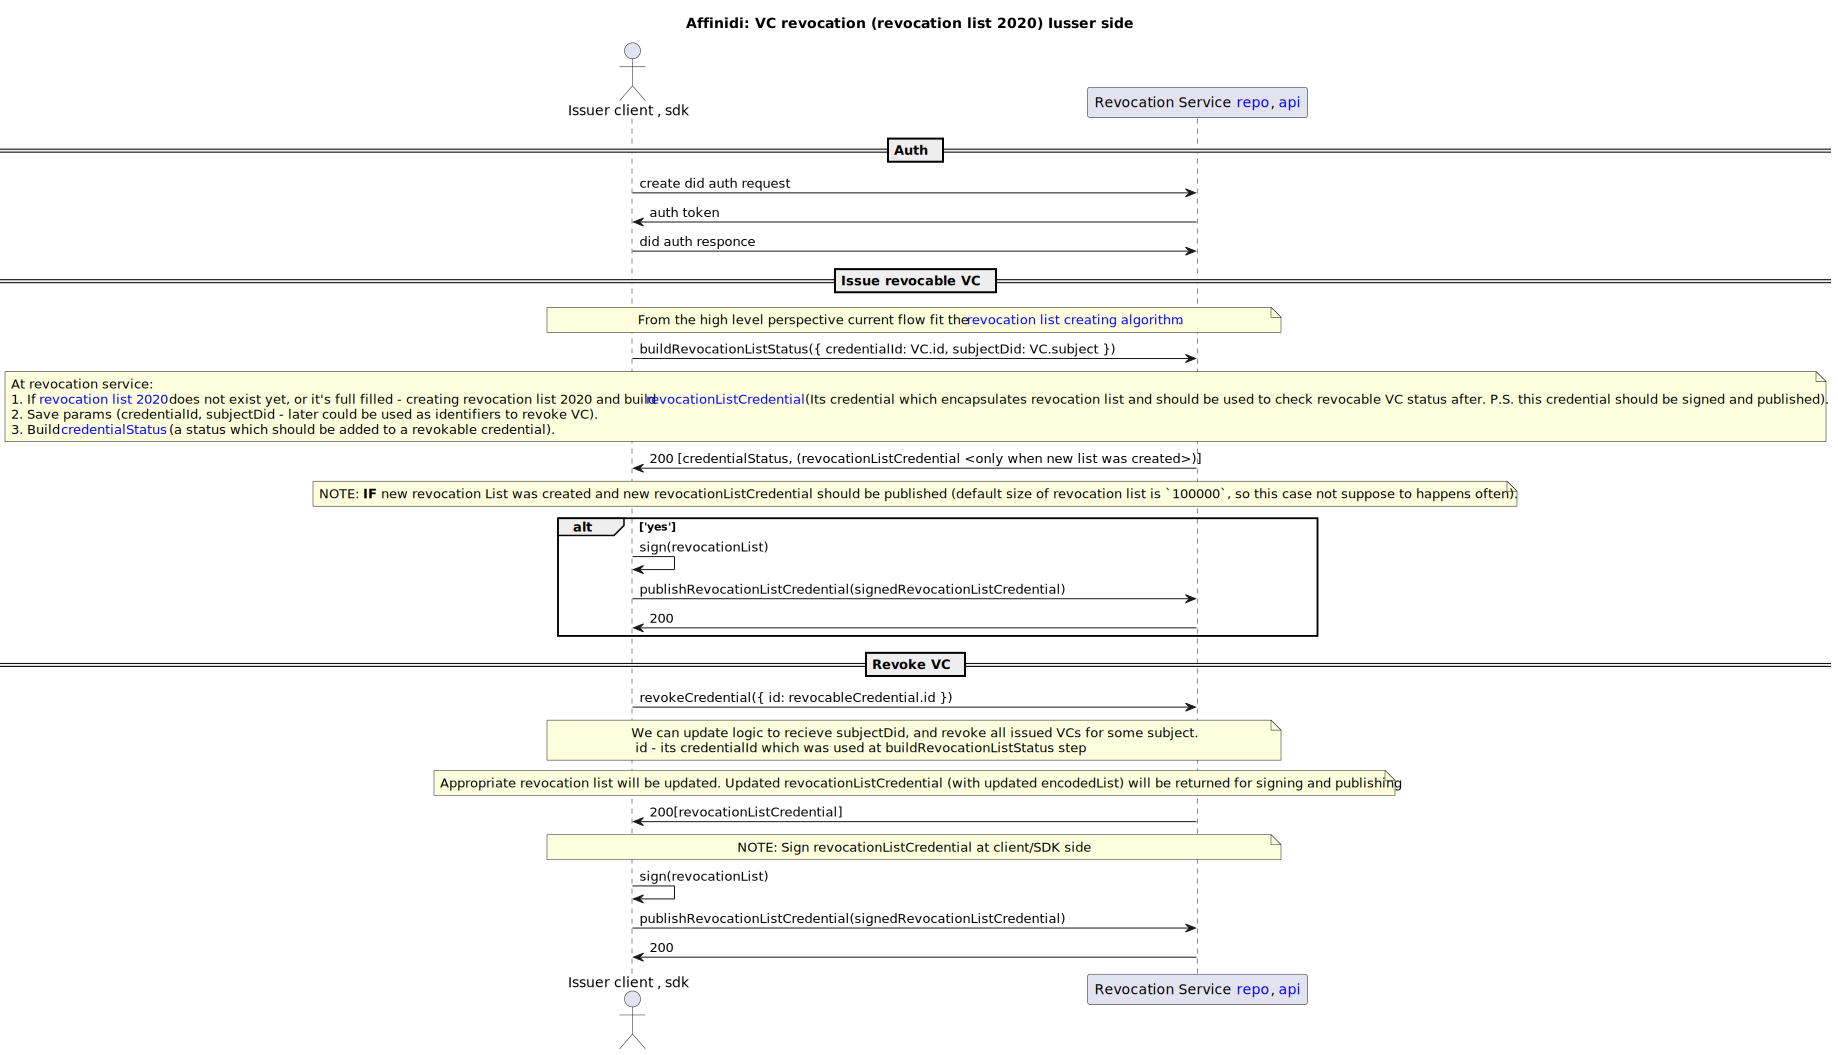

In [68]:
%%plantuml
@startuml
title Affinidi: VC revocation (revocation list 2020) Iusser side
actor  "Issuer client , sdk" as client
participant "Revocation Service [[https://gitlab.com/affinidi/foundational/revocation-api repo]], [[http://revocation-api.prod.affinity-project.org/api-docs/ api]]" as rs 
== Auth ==
client -> rs: create did auth request
rs -> client : auth token
client -> rs: did auth responce 
== Issue revocable VC ==
note across: From the high level perspective current flow fit the [[https://w3c-ccg.github.io/vc-status-rl-2020/#generate-algorithm revocation list creating algorithm]].
 client -> rs : buildRevocationListStatus({ credentialId: VC.id, subjectDid: VC.subject })
note across
At revocation service:
1. If [[https://w3c-ccg.github.io/vc-status-rl-2020/#core-concept revocation list 2020]] does not exist yet, or it's full filled - creating revocation list 2020 and build [[https://w3c-ccg.github.io/vc-status-rl-2020/#revocationlist2020credential revocationListCredential]] (Its credential which encapsulates revocation list and should be used to check revocable VC status after. P.S. this credential should be signed and published).
2. Save params (credentialId, subjectDid - later could be used as identifiers to revoke VC).
3. Build [[https://w3c-ccg.github.io/vc-status-rl-2020/#revocationlist2020status credentialStatus]] (a status which should be added to a revokable credential).
end note
rs -> client : 200 [credentialStatus, (revocationListCredential <only when new list was created>)]
note across: NOTE: **IF** new revocation List was created and new revocationListCredential should be published (default size of revocation list is `100000`, so this case not suppose to happens often).
alt 'yes'
client -> client: sign(revocationList)
client -> rs: publishRevocationListCredential(signedRevocationListCredential)
rs -> client: 200
end
== Revoke VC ==
client -> rs: revokeCredential({ id: revocableCredential.id })

note across:  We can update logic to recieve subjectDid, and revoke all issued VCs for some subject.\n id - its credentialId which was used at buildRevocationListStatus step
note across: Appropriate revocation list will be updated. Updated revocationListCredential (with updated encodedList) will be returned for signing and publishing

rs -> client: 200[revocationListCredential]
note across: NOTE: Sign revocationListCredential at client/SDK side
client -> client: sign(revocationList)           
client -> rs: publishRevocationListCredential(signedRevocationListCredential)
rs -> client: 200
@enduml
